In [1]:
import os
import sys

sys.path.append("../python")

import matplotlib.pyplot as plt
import numpy as np

In [2]:
from data import Dataloader
from models import HeuristicModel
from metrics import PairsExplained, ClusterIntersection

In [3]:
# Loading the data
data_loader = Dataloader("../data/dataset_10") # Specify path to the dataset you want to load
Z = data_loader.get_ground_truth_labels()
X, Y = data_loader.load()

Set parameter Username
Academic license - for non-commercial use only - expires 2024-12-11
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-1255U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13737 rows, 54764 columns and 502239 nonzeros
Model fingerprint: 0xae8edf3d
Coefficient statistics:
  Matrix range     [5e-06, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-03, 1e+00]
Presolve removed 20 rows and 41038 columns
Presolve time: 0.34s
Presolved: 13717 rows, 13726 columns, 412710 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time: 0.06s

Barrier statistics:
 Dense cols : 50
 AA' NZ     : 3.990e+05
 Factor NZ  : 4.140e+05 (roughly 16 MB of memory)
 Factor Ops : 1.258e+07 (less than 1 second per iteration)


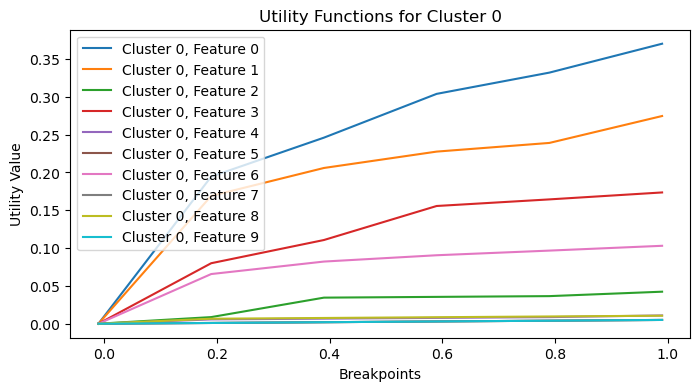

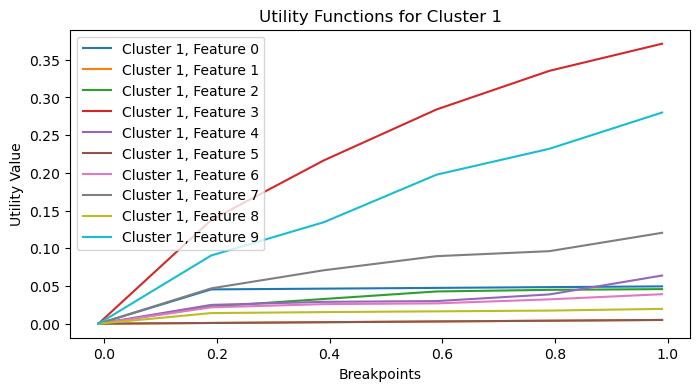

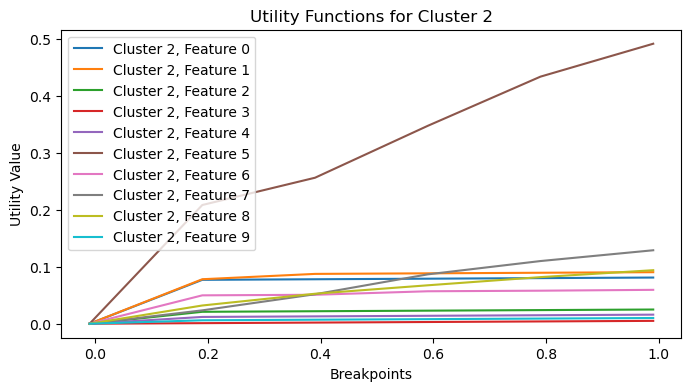

In [4]:
parameters = {"n_clusters" : 3,
              "n_pieces": 5,
              "nb_criteres": 10
              } 
model = HeuristicModel(**parameters)
model.fit(X, Y)

In [5]:
pairs_explained = PairsExplained()
cluster_intersection = ClusterIntersection()

In [6]:
print("Percentage of explained preferences on train data:", pairs_explained.from_model(model, X, Y)) # You should get 1.0 with the right MIP
print("Percentage of preferences well regrouped into clusters:", cluster_intersection.from_model(model, X, Y, Z))

Percentage of explained preferences on train data: 0.9798760061996901
Percentage of preferences well regrouped into clusters: 0.8543350113062332
